T7DQ1

In what situations might you choose to use ANOVA over linear regression or vice versa? Provide a real-life example dataset and explain how you would approach the data analysis using either ANOVA or linear regression. Justify your choice of one of the two approaches. How can Python be used to develop a useful tool in this context?

ANOVA (Analysis of Variance) and Linear Regression  are statistical methods used to analyze data, but the are chose based on different scenarios and research questions. 


ANOVA - Analysis of Variance


Purpose:  a test of hypothesis that is appropriate to compare means of a continuous variable in two or more independent comparison groups


Type of Data:  Dependent Variable: continuous (interval or ration) level of measurement, Independent Variables: categorical (nominal or ordinal)


When to Use: when you want to test a particular hypothesis between groups


Hypotheses:  null hypothesis: no difference between groups, alternative hypothesis at least one group differs significatly from overall mean.


Output:  boxplots, shapiro wilk test for normality and test for homogeneity of variances.


Real-life Example Dataset:  participates are divided into seperate categories bipolar, control and depressive


Example Approach: ANOVA to figure out the right answers 


Justification: sutiable means for each category





In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [5]:
df = pd.read_csv("Database MiniPONS.csv",sep =";")
df

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27
...,...,...,...,...,...,...,...,...,...,...,...,...
272,UD,UD,53,46,12,10,11,13,21,25,25,21
273,UD,UD,35,50,13,15,13,9,28,22,23,27
274,UD,UD,49,36,9,8,10,9,16,20,16,20
275,UD,UD,43,39,12,9,9,9,16,23,20,19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Group             277 non-null    object
 1   Type              277 non-null    object
 2   Age               277 non-null    int64 
 3   Right_answers     277 non-null    int64 
 4   Audio_prosody     277 non-null    int64 
 5   Combined_channel  277 non-null    int64 
 6   Face_video        277 non-null    int64 
 7   Body_video        277 non-null    int64 
 8   Positive_valence  277 non-null    int64 
 9   Negative_valence  277 non-null    int64 
 10  Dominant          277 non-null    int64 
 11  Submissive        277 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 26.1+ KB


In [6]:
df.describe()

,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,48.718412,47.079422,11.425993,12.339350,11.794224,11.519856,23.555957,23.523466,23.454874,23.624549
std,12.452524,5.231680,2.122800,1.931903,1.693199,1.912147,3.215893,3.132981,3.125796,3.033003
min,21.000000,28.000000,3.000000,6.000000,8.000000,5.000000,13.000000,10.000000,12.000000,13.000000
25%,39.000000,44.000000,10.000000,11.000000,11.000000,10.000000,22.000000,22.000000,22.000000,22.000000
50%,50.000000,47.000000,12.000000,12.000000,12.000000,12.000000,24.000000,24.000000,24.000000,24.000000
75%,58.000000,51.000000,13.000000,14.000000,13.000000,13.000000,26.000000,26.000000,26.000000,26.000000
max,78.000000,58.000000,16.000000,16.000000,15.000000,16.000000,30.000000,30.000000,31.000000,30.000000


In [8]:
df["Group"].value_counts()

Group
Bipolar    119
Control    119
UD          39
Name: count, dtype: int64

In [9]:
df["Type"].value_counts()

Type
Control    119
BD I        70
BD II       49
UD          39
Name: count, dtype: int64

In [10]:
groups = df["Group"].unique().tolist()

# number of groups
K = len(groups)

# number of total observations
n = df.shape[0]

# numbers of observation within each group
n_group = df["Group"].value_counts().values.tolist()

Right Answers between Groups

Visualization

In [11]:
gb = df.groupby(['Group'])
gb.agg({'Right_answers' : ['count', 'min', 'max', 'mean', 'std']})

Right_answers                             
                count min max       mean       std
Group                                             
Bipolar           119  28  56  45.352941  4.795104
Control           119  39  58  50.235294  3.704569
UD                 39  32  53  42.717949  4.973343

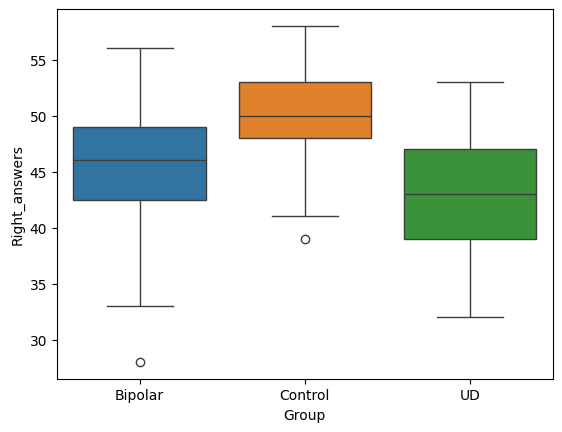

In [12]:
g = sns.boxplot(data = df, x = "Group", y = 'Right_answers', hue = df.Group.to_list())
plt.show()


One way ANOVA


The hypothesises are as follow :

𝐻0: The expected value of right answers is the same for every group

𝐻1: Alternative hypothesis

In [13]:
samples = []
for group in groups:
    sample = df['Right_answers'].loc[df.Group == group]
    samples.append(sample)

In [22]:
moy_emp = df['Right_answers'].mean()
moy_emp_k = np.array([np.array(sample).mean() for sample in samples])
var_cor_k = np.array([np.array(sample).var(ddof=1) for sample in samples])

nk = np.array([len(np.array(sample)) for sample in samples])

In [23]:
SSW = (np.vectorize(lambda n, var : (n-1)*var)(nk,var_cor_k)).sum()
MSW = SSW/(n-K)

SSB = np.multiply(nk,np.square(moy_emp_k)).sum() - n * moy_emp**2
MSB = SSB/(K-1)

f = MSB/MSW

# critical region {F > f} ==> pvalue

In [24]:
f_oneway(*samples)

F_onewayResult(statistic=59.28931882990565, pvalue=4.016744390432311e-22)

Linear Regression

Linear Regression


Purpose: estimate how y changes when x changes one unit


Type of Data: dependent variable: continuous


When to Use: continuous out come variables


Hypotheses: used to confirm if our beta coefficients are significant


Output: best fit line


Real-life Example Dataset: medical insurance cost personal 


Example Approach:


Justification:

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [8,5]

In [29]:
ds=pd.read_csv("insurance.csv")
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
ds.shape

(1338, 7)

In [32]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'BMI Vs Charges')

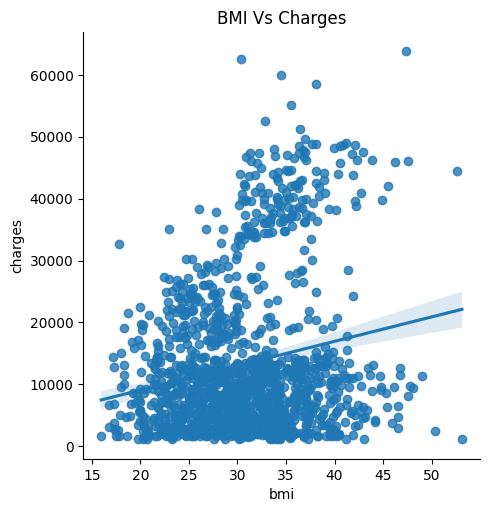

In [35]:
#plot between bmi and charges
sns.lmplot(x="bmi",y="charges",data=ds)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("BMI Vs Charges")

In [36]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
#correlation
corr=ds.corr(numeric_only=True)
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

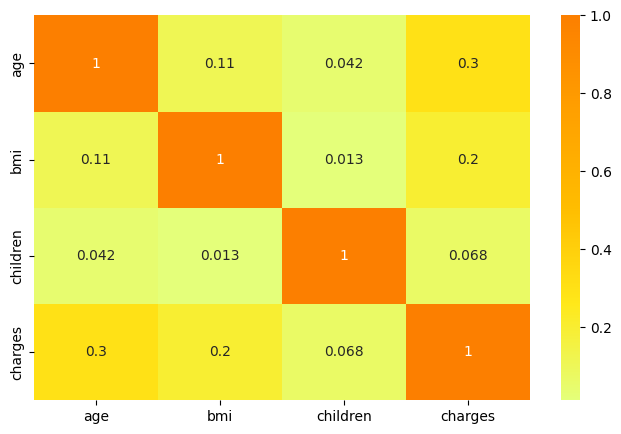

In [39]:
sns.heatmap(corr,cmap="Wistia",annot=True)

<Axes: xlabel='charges', ylabel='Count'>

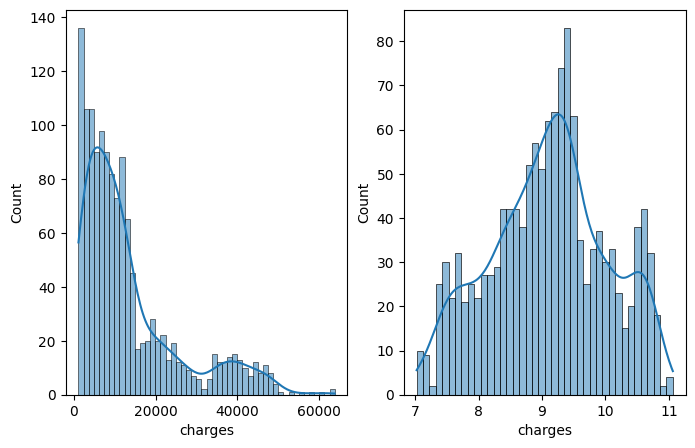

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.histplot(ds["charges"],kde=True,bins=50,fill=True,ax=ax1)
#data is right skewed
sns.histplot(np.log(ds["charges"]),kde=True,bins=40,fill=True,ax=ax2)

<Axes: xlabel='smoker', ylabel='charges'>

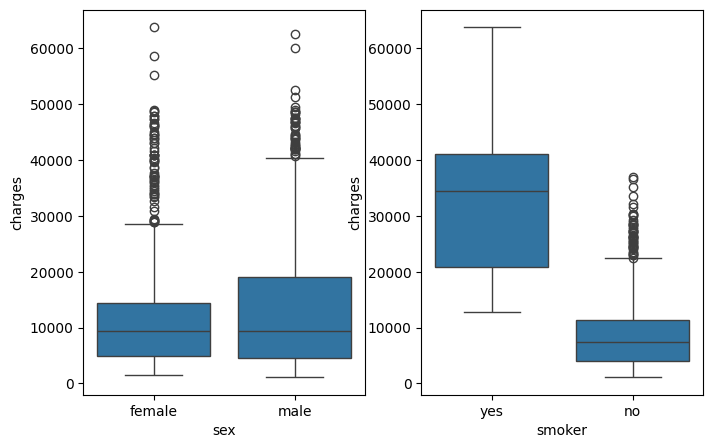

In [42]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.boxplot(x="sex",y="charges",data=ds,ax=ax1)
sns.boxplot(x="smoker",y="charges",data=ds,ax=ax2)

In [43]:
ds["children"].unique()

array([0, 1, 3, 2, 5, 4])

<Axes: xlabel='children', ylabel='charges'>

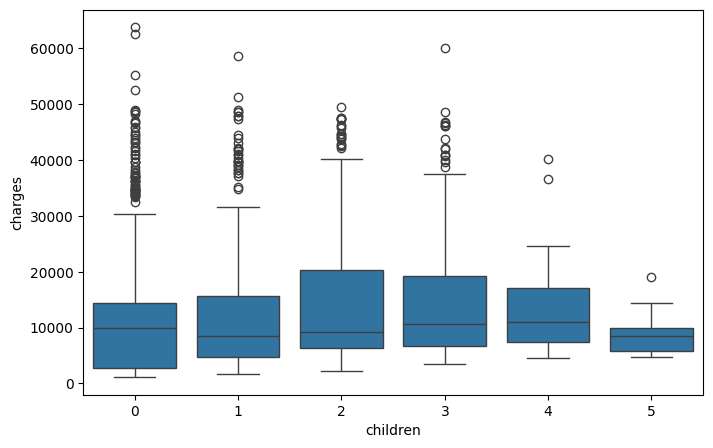

In [44]:
sns.boxplot(x="children",y="charges",data=ds)

In [45]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
categorical_columns=['sex','children','smoker','region']
##one hot encoding
ds_encoded=pd.get_dummies(data=ds,prefix='OHE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')
ds_encoded

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [48]:
ds_encoded.head()
ds_encoded['charges'] = np.log10(ds_encoded['charges'])

In [49]:
ds_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


In [50]:
X = ds_encoded.drop(['charges'],axis=1) 
y = ds_encoded['charges']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=23)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [53]:
lin_reg.intercept_

3.062978299536124

In [54]:
lin_reg.coef_

array([ 0.01444671,  0.00602147, -0.02944889,  0.06189173,  0.12096344,
        0.11067308,  0.21752704,  0.18325311,  0.67325594, -0.02533175,
       -0.06603729, -0.06177725])

In [55]:
y_pred=lin_reg.predict(X_test)
y_pred

array([4.05225592, 3.76880444, 4.50041927, 3.9500613 , 3.65523382,
       3.90567304, 4.6682235 , 3.7224976 , 4.12688523, 4.76463795,
       3.52544053, 4.79737927, 3.56385864, 4.10567234, 3.8222123 ,
       3.70246063, 3.7543137 , 3.52525711, 4.53766051, 4.53949591,
       4.86446396, 3.98046916, 3.85432435, 3.99085138, 4.59888988,
       3.70166436, 3.71344013, 4.17846454, 3.46393076, 3.95886114,
       4.07935735, 3.54833185, 3.64878881, 4.10271167, 3.81585639,
       4.26809615, 4.07660033, 3.92741055, 4.00423127, 3.64749407,
       3.99871209, 4.60708807, 3.99951559, 4.59038063, 4.02108629,
       4.03772313, 3.68204154, 3.72146003, 3.93416349, 3.7806824 ,
       4.08767726, 3.84661165, 3.96672129, 3.60980005, 3.66667319,
       4.06295867, 4.02343326, 3.98658583, 3.83520537, 4.18048839,
       4.32165758, 3.68561496, 3.43485214, 3.66956194, 3.53525695,
       3.75009549, 3.48748368, 3.45207354, 3.66021303, 4.10617548,
       3.7749905 , 4.59310548, 3.93093647, 4.48653296, 3.48367

In [56]:
mean_squared_error(y_pred,y_test)

0.03333484879078236

In [57]:
lin_reg.score(X_test,y_test)

0.8027551570299628